In [1]:
import pandas as pd 
import numpy as np 
import csv
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

print(pd.__version__)
hotel_data = pd.read_csv('training_set_VU_DM.csv')
booked = hotel_data[hotel_data["booking_bool"] == 1]
result = booked.dtypes
print(result)
##Position ranges from 1 to 40 

## correlation between children and distance from origin 

child_max = booked['srch_children_count'].max()
print(child_max)

## children range from 0 to 9 

booked.groupby(['srch_children_count'])
booked['srch_children_count'].value_counts()

booked['srch_children_count'].sum()

1.2.4
srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_di

50821

138390
138390


<ipython-input-2-6cd2ad85ee36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booked['orig_destination_distance'] = booked['orig_destination_distance'].dropna()


<AxesSubplot:title={'center':'Family correlation'}, xlabel='Children', ylabel='Distance from origin'>

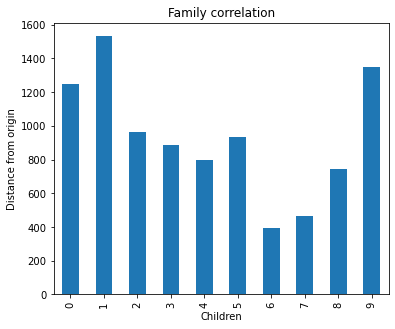

In [2]:
print(booked['orig_destination_distance'].shape[0])
booked['orig_destination_distance'] = booked['orig_destination_distance'].dropna()
print(booked['orig_destination_distance'].shape[0])
dfg = booked.groupby(['srch_children_count'])['orig_destination_distance'].mean()
dfg.plot(kind='bar', title='Family correlation', ylabel='Distance from origin',
         xlabel='Children', figsize=(6, 5))

0         AxesSubplot(0.1,0.736957;0.235294x0.163043)
1    AxesSubplot(0.382353,0.736957;0.235294x0.163043)
2    AxesSubplot(0.664706,0.736957;0.235294x0.163043)
3         AxesSubplot(0.1,0.541304;0.235294x0.163043)
4    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
5    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
6         AxesSubplot(0.1,0.345652;0.235294x0.163043)
7    AxesSubplot(0.382353,0.345652;0.235294x0.163043)
8    AxesSubplot(0.664706,0.345652;0.235294x0.163043)
9             AxesSubplot(0.1,0.15;0.235294x0.163043)
dtype: object

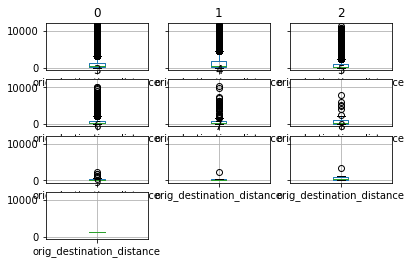

In [3]:
booked.groupby("srch_children_count").boxplot(column="orig_destination_distance")

In [4]:
## count null values in orig_destination_distance



In [5]:
import datetime
mydate = datetime.datetime.now()
month = mydate.strftime("%B")
print(type(month))

#booked['date_time'].dt.strftime("%B")

#strftime('%B %d, %Y')

booked['date_time'] = pd.to_datetime(booked['date_time'],errors='coerce')


booked['date_time'] = booked['date_time'].dt.strftime('%m')
print(booked['date_time'])

<class 'str'>


<ipython-input-5-c0543e31bfc7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booked['date_time'] = pd.to_datetime(booked['date_time'],errors='coerce')


12         04
63         06
68         03
194        02
211        12
           ..
4958241    11
4958275    03
4958304    11
4958321    06
4958345    06
Name: date_time, Length: 138390, dtype: object


<ipython-input-5-c0543e31bfc7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booked['date_time'] = booked['date_time'].dt.strftime('%m')


In [6]:
booked['date_time'] = booked['date_time'].astype(str).astype(int)



<ipython-input-6-3854a0f4be4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booked['date_time'] = booked['date_time'].astype(str).astype(int)


/Users/smrutiinamdar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date_time', ylabel='count'>

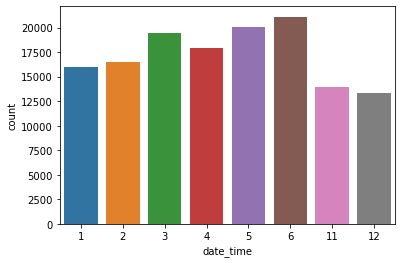

In [7]:
sns.countplot('date_time',data=booked.sort_values(by=['date_time']))

In [8]:
## click an book bool. 

#booked_val = booked[booked['click_bool']==1][booked['booking_bool']==1]
#booked_val.value_counts()

clicked = hotel_data['click_bool']
print(clicked.value_counts())


booked_val = hotel_data['booking_bool'].value_counts()



0    4736468
1     221879
Name: click_bool, dtype: int64


site_id  prop_review_score
1        4.0                  111
         4.5                   92
         3.5                   51
         3.0                   17
         5.0                   11
                             ... 
34       3.0                   11
         0.0                    9
         2.5                    4
         2.0                    2
         1.5                    1
Name: prop_review_score, Length: 286, dtype: int64

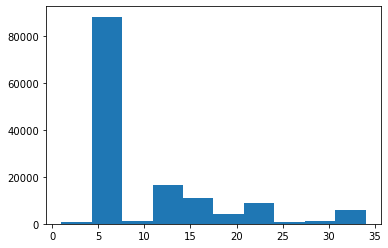

In [12]:
##popular site IDs

booked['site_id'].value_counts()
plt.hist(booked['site_id'])

pop_hotels  = booked.groupby(['site_id'])['prop_review_score'].value_counts()
pop_hotels